This notebook is just here because I got a bit scared by the filename of the zerofield dataframes: '_temp' . Turns out it is fine. No need for higher stats, I think.

In [1]:
import pickle
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pickle.load(open('/data/xenon/ehogenbi/pulsefit/pickles/zerofield_dataframes_temp.pickle', 'rb'))

In [3]:
len(df)

35805

In [4]:
df.keys()

Index(['run_number', 'event_number', 'largest_other_s1', 'n_s1s', 's1_area',
       's1_area_fraction_top', 's1_area_midpoint', 's1_center_time',
       's1_height', 's1_left', 's1_n_saturated_channels', 's1_range_20p_area',
       's1_range_50p_area', 's1_range_80p_area', 's1_right',
       's1_time_from_midpoint_10p', 's1_time_from_midpoint_20p',
       's1_time_from_midpoint_30p', 's1_time_from_midpoint_40p',
       'event_duration', 'event_time', 't', 'ms_since_previous_event', 's1',
       'z', 'cs1', 'n_g', 'e_ces', 's1_pulse', 's1_10_percentile_point',
       's1_20_percentile_point', 's1_30_percentile_point',
       's1_40_percentile_point', 's1_fraction_outside_pulse'],
      dtype='object')

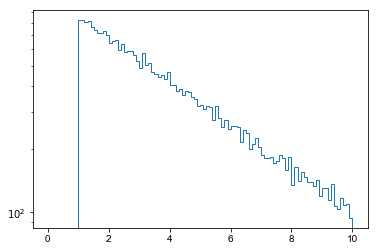

In [5]:
plt.hist(df['ms_since_previous_event'], bins=100, histtype='step', range=(0, 10))
plt.yscale('log')

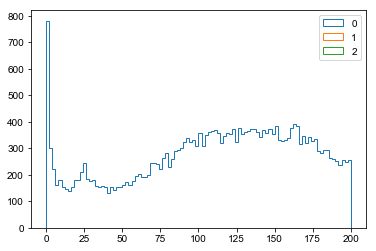

In [6]:
for nsat in [0, 1, 2]:
    sel = df['s1_n_saturated_channels'] == nsat
    plt.hist(df[sel]['e_ces'], bins=100, histtype='step', range=(0, 200), label='%d' % nsat)
plt.legend()
plt.show()

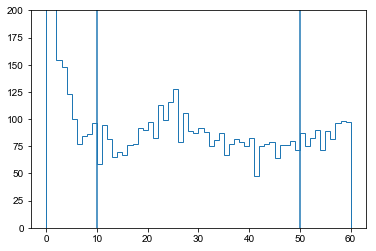

In [7]:
plt.hist(df['e_ces'], range=(0, 60), bins=60, histtype='step')
for l in [10, 50]:
    plt.axvline(l)
plt.ylim(0, 200)
plt.show()

In [8]:
d = df[(df['e_ces'] > 10) & (df['e_ces'] > 10) ]

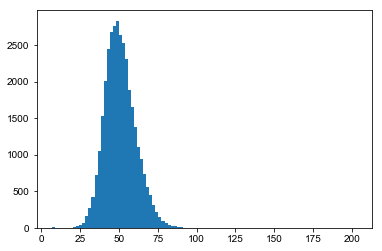

In [13]:
plt.hist(d['s1_range_50p_area'], bins=100)
plt.show()

In [14]:
%run ../definitions.ipynb

In [15]:
def fitfunc(x, mu, sigma, off):
    return gaus_with_bg(x, 1, mu, sigma, off, 0)

FCN = 22197.719990276106 
 TOTAL NCALL = 0 
 NCALLS = 56 
 
 
 EDM = 1.7306733435507033e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,x0,24.6746,0.850362,0,0,,,
2,x1,5.24075,1.2696,0,0,,,
3,x2,2.22994,0.487108,0,0,,,


(array([ 24.67462123,   5.24074692,   2.22993894]),
 array([ 0.85036204,  1.26959932,  0.48710799]),
 <iminuit._libiminuit.Minuit at 0x7f344a18d610>)

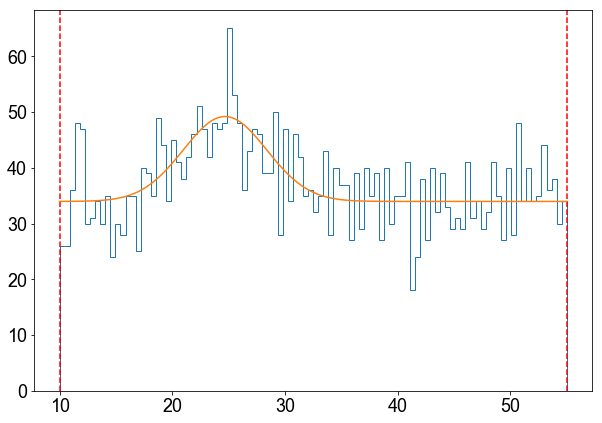

In [20]:
fit_unbinned(df['e_ces'], fitfunc, [25, 4, 2], plot=True, fit_range=(10, 55),plot_guess=False)

The line feature is at 24.7 pm 0.9, so... Correction factor is


In [22]:
corrfac = 29.8 / 24.7
print(corrfac)

1.2064777327935223


In [23]:
0.9 / 24.7

0.03643724696356276

FCN = 24842.447510676477 
 TOTAL NCALL = 0 
 NCALLS = 56 
 
 
 EDM = 3.512929260696995e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,x0,196.359,6.76057,0,0,,,
2,x1,38.8901,9.56195,0,0,,,
3,x2,2.35515,0.538767,0,0,,,


(array([ 196.35857265,   38.89011108,    2.35514808]),
 array([ 6.7605729 ,  9.56194901,  0.5387668 ]),
 <iminuit._libiminuit.Minuit at 0x7f344a18d860>)

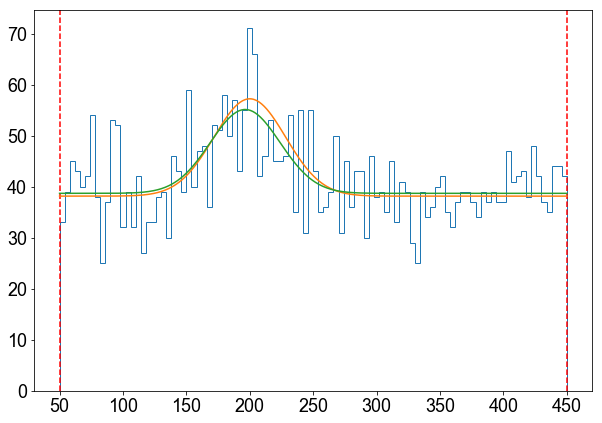

In [30]:
fit_unbinned(df['cs1'], fitfunc, [200, 40, 2], plot=True, fit_range=(50, 450),plot_guess=True, delay_fit=False)

In [14]:
13.7 * df['cs1'] / df['e_ces'] * 1e-3

1         0.109266
2         0.109266
5         0.109266
6         0.109266
8         0.109266
14        0.109266
19        0.109266
26        0.109266
33        0.109266
35        0.109266
36        0.109266
37        0.109266
39        0.109266
41        0.109266
45        0.109266
46        0.109266
52        0.109266
67        0.109266
74        0.109266
93        0.109266
95        0.109266
105       0.109266
106       0.109266
132       0.109266
134       0.109266
141       0.109266
142       0.109266
143       0.109266
145       0.109266
161       0.109266
            ...   
242851    0.109266
242854    0.109266
242856    0.109266
242861    0.109266
242862    0.109266
242873    0.109266
242876    0.109266
242877    0.109266
242885    0.109266
242889    0.109266
242922    0.109266
242924    0.109266
242925    0.109266
242931    0.109266
242932    0.109266
242933    0.109266
242934    0.109266
242952    0.109266
242959    0.109266
242967    0.109266
242981    0.109266
242988    0.

In [12]:
pickle.load(open('../light_yield/data/doke_sel2_ext.pickle', 'rb'))

array([ 0.10926594,  4.39171512])

In [13]:
pickle.load(open('../light_yield/data/doke_sel2.pickle', 'rb'))

array([ 0.09811548,  4.71819016])